# Проект: автоматизация дашборда с анализом данных о поведении пользователей статей Яндекс-Дзена

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Цели-и-задачи-данного-notebook-в-составе-Проекта" data-toc-modified-id="Цели-и-задачи-данного-notebook-в-составе-Проекта-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Цели и задачи данного notebook в составе Проекта</a></span><ul class="toc-item"><li><span><a href="#Цель:" data-toc-modified-id="Цель:-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Цель:</a></span></li><li><span><a href="#Решаемые-задачи:" data-toc-modified-id="Решаемые-задачи:-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Решаемые задачи:</a></span></li></ul></li><li><span><a href="#Выгрузка-из-БД-файла-исходных-данных" data-toc-modified-id="Выгрузка-из-БД-файла-исходных-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Выгрузка из БД файла исходных данных</a></span></li><li><span><a href="#Изучение-полученных-данных" data-toc-modified-id="Изучение-полученных-данных-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Изучение полученных данных</a></span><ul class="toc-item"><li><span><a href="#Уникальные-значения-/-статистика-диапазона-значений-полей-таблицы" data-toc-modified-id="Уникальные-значения-/-статистика-диапазона-значений-полей-таблицы-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Уникальные значения / статистика диапазона значений полей таблицы</a></span><ul class="toc-item"><li><span><a href="#поле-item_topic---тип-object-(строка):" data-toc-modified-id="поле-item_topic---тип-object-(строка):-3.1.1"><span class="toc-item-num">3.1.1&nbsp;&nbsp;</span>поле <code>item_topic</code> - тип object (строка):</a></span></li><li><span><a href="#поле-source_topic---тип-object-(строка):" data-toc-modified-id="поле-source_topic---тип-object-(строка):-3.1.2"><span class="toc-item-num">3.1.2&nbsp;&nbsp;</span>поле <code>source_topic</code> - тип object (строка):</a></span></li><li><span><a href="#Выводы-по-темам:" data-toc-modified-id="Выводы-по-темам:-3.1.3"><span class="toc-item-num">3.1.3&nbsp;&nbsp;</span>Выводы по темам:</a></span></li><li><span><a href="#поле-age_segment---тип-object-(строка):" data-toc-modified-id="поле-age_segment---тип-object-(строка):-3.1.4"><span class="toc-item-num">3.1.4&nbsp;&nbsp;</span>поле <code>age_segment</code> - тип object (строка):</a></span></li><li><span><a href="#поле-dt---тип-datetime-(временная-метка)" data-toc-modified-id="поле-dt---тип-datetime-(временная-метка)-3.1.5"><span class="toc-item-num">3.1.5&nbsp;&nbsp;</span>поле <code>dt</code> - тип datetime (временная метка)</a></span></li><li><span><a href="#Выводы-по-временным-меткам-данных:" data-toc-modified-id="Выводы-по-временным-меткам-данных:-3.1.6"><span class="toc-item-num">3.1.6&nbsp;&nbsp;</span>Выводы по временным меткам данных:</a></span></li><li><span><a href="#поле-visits---тип-int-(кол-во-взаимодействий-с-пользователями)" data-toc-modified-id="поле-visits---тип-int-(кол-во-взаимодействий-с-пользователями)-3.1.7"><span class="toc-item-num">3.1.7&nbsp;&nbsp;</span>поле <code>visits</code> - тип int (кол-во взаимодействий с пользователями)</a></span></li><li><span><a href="#Выводы-и-предположения-по-полю-visits:" data-toc-modified-id="Выводы-и-предположения-по-полю-visits:-3.1.8"><span class="toc-item-num">3.1.8&nbsp;&nbsp;</span>Выводы и предположения по полю visits:</a></span></li></ul></li><li><span><a href="#Проверка-дупликатов:" data-toc-modified-id="Проверка-дупликатов:-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Проверка дупликатов:</a></span></li><li><span><a href="#Выводы-по-необходимым-модификациям-данных-для-загрузки-в-Tableau-Public" data-toc-modified-id="Выводы-по-необходимым-модификациям-данных-для-загрузки-в-Tableau-Public-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Выводы по необходимым модификациям данных для загрузки в Tableau Public</a></span></li></ul></li><li><span><a href="#Модификация-датасета-под-требования-Tableau-и-сохранение-в-файл-dash_visits.csv-для-загрузки-в-Tableau-Public" data-toc-modified-id="Модификация-датасета-под-требования-Tableau-и-сохранение-в-файл-dash_visits.csv-для-загрузки-в-Tableau-Public-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Модификация датасета под требования Tableau и сохранение в файл <code>dash_visits.csv</code> для загрузки в Tableau Public</a></span></li></ul></div>

## Цели и задачи данного notebook в составе Проекта

### Цель:
1. Замкнуть автоматизированный дата-инженерами `data pipeline` сборки необходимых данных на систему подготовки отчетов **dashboard - Tableau Public**.

### Решаемые задачи:
1. Выгрузка из БД в датасет Pandas исходных данных - дата-инженерами реализована интеграция с пайплайном сбора данных через таблицу БД `dash_visits`.
2. Изучение структуры данных средствами Pandas на предмет ее модификации к требованиям **Tableau Public**.
3. Обработка и модификация средствами Pandas датасета с данными, полученными из автоматизированного пайплайна.
4. Сохранение модифицированных данных в локальном файле `dash_visits.csv`, готовом для загрузки в **Tableau Public**.

In [1]:
# импортируем библиотеки

import pandas as pd
from sqlalchemy import create_engine
import datetime as dt

start_run = dt.datetime.now() # будем измерять время выполнения команды run-all-cells

## Выгрузка из БД файла исходных данных

In [2]:
# создаем соединение с базой данных 

db_config = {'user': 'praktikum_student', # имя пользователя
            'pwd': 'Sdf4$2;d-d30pp', # пароль
            'host': 'rc1b-wcoijxj3yxfsf3fs.mdb.yandexcloud.net',
            'port': 6432, # порт подключения
            'db': 'data-analyst-zen-project-db'} # название базы данных

connection_string = 'postgresql://{}:{}@{}:{}/{}'.format(db_config['user'],
                                                db_config['pwd'],
                                                db_config['host'],
                                                db_config['port'],
                                                db_config['db'])

engine = create_engine(connection_string)

In [3]:
# выгружаем исходные данные из таблицы БД `dash_visits` в одноименный датафрейм

sql_command = '''
SELECT * FROM dash_visits
''' 

dash_visits_df = pd.io.sql.read_sql(sql_command, con = engine)

## Изучение полученных данных

In [4]:
dash_visits_df.info()
dash_visits_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30745 entries, 0 to 30744
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   record_id     30745 non-null  int64         
 1   item_topic    30745 non-null  object        
 2   source_topic  30745 non-null  object        
 3   age_segment   30745 non-null  object        
 4   dt            30745 non-null  datetime64[ns]
 5   visits        30745 non-null  int64         
dtypes: datetime64[ns](1), int64(2), object(3)
memory usage: 1.4+ MB


,record_id,item_topic,source_topic,age_segment,dt,visits
0,1040597,Деньги,Авто,18-25,2019-09-24 18:32:00,3
1,1040598,Деньги,Авто,18-25,2019-09-24 18:35:00,1
2,1040599,Деньги,Авто,18-25,2019-09-24 18:54:00,4
3,1040600,Деньги,Авто,18-25,2019-09-24 18:55:00,17
4,1040601,Деньги,Авто,18-25,2019-09-24 18:56:00,27


### Уникальные значения / статистика диапазона значений полей таблицы

#### поле `item_topic` - тип object (строка):

In [5]:
print(f'Всего уникальных значений {dash_visits_df["item_topic"].value_counts().count()}')

print('____________________________________')

dash_visits_df['item_topic'].value_counts(dropna=False).reset_index(
                                          ).rename(columns={'index':'item_topic','item_topic':'count'})

Всего уникальных значений 25
____________________________________


,item_topic,count
0,Отношения,1536
1,Интересные факты,1535
2,Наука,1505
3,Подборки,1456
4,Полезные советы,1424
5,Общество,1422
6,Россия,1385
7,История,1363
8,Семья,1287
9,Путешествия,1247


#### поле `source_topic` - тип object (строка):

In [6]:
print(f'Всего уникальных значений {dash_visits_df["source_topic"].value_counts().count()}')

print('____________________________________')

dash_visits_df['source_topic'].value_counts(dropna=False).reset_index(
                                          ).rename(columns={'index':'source_topic','source_topic':'count'})

Всего уникальных значений 26
____________________________________


,source_topic,count
0,Семейные отношения,1822
1,Россия,1687
2,Знаменитости,1650
3,Полезные советы,1578
4,Путешествия,1563
5,Кино,1505
6,Дети,1459
7,История,1437
8,Семья,1405
9,Одежда,1379


#### Выводы по темам:
Названия тем для источников и карточек весьма слабо совпадают:

In [7]:
inner_df = dash_visits_df.groupby('item_topic',as_index=False).agg({'visits':'sum'}).merge(
dash_visits_df.groupby('source_topic',as_index=False).agg({'visits':'sum'}),
how='inner', left_on='item_topic', right_on='source_topic')

outer_df = dash_visits_df.groupby('item_topic',as_index=False).agg({'visits':'sum'}).merge(
dash_visits_df.groupby('source_topic',as_index=False).agg({'visits':'sum'}),
how='outer', left_on='item_topic', right_on='source_topic')

print('ВЫВОДЫ:')
print('_________________')
print(f'Совпадает {len(inner_df)} тем: \n', list(inner_df['item_topic']))
print('__________________________')
print(f'Не совпадает всего {outer_df["source_topic"].isna().sum()+outer_df["item_topic"].isna().sum()} тем,')
print()
print(f'из них {outer_df["source_topic"].isna().sum()} значений для item_topic:',
     list(outer_df[outer_df["source_topic"].isna()].item_topic))
print()
print(f'и {outer_df["item_topic"].isna().sum()} значений для source_topic:',
     list(outer_df[outer_df["item_topic"].isna()].source_topic))

ВЫВОДЫ:
_________________
Совпадает 11 тем: 
 ['Деньги', 'Дети', 'Здоровье', 'Знаменитости', 'Искусство', 'История', 'Полезные советы', 'Психология', 'Путешествия', 'Россия', 'Семья']
__________________________
Не совпадает всего 29 тем,

из них 14 значений для item_topic: ['Женская психология', 'Женщины', 'Интересные факты', 'Красота', 'Культура', 'Наука', 'Общество', 'Отношения', 'Подборки', 'Рассказы', 'Скандалы', 'Туризм', 'Шоу', 'Юмор']

и 15 значений для source_topic: ['Авто', 'Еда', 'Интерьеры', 'Кино', 'Музыка', 'Одежда', 'Политика', 'Ремонт', 'Сад и дача', 'Сделай сам', 'Семейные отношения', 'Спорт', 'Строительство', 'Технологии', 'Финансы']


#### поле `age_segment` - тип object (строка):

In [8]:
print(f'Всего уникальных значений {dash_visits_df["age_segment"].value_counts().count()}')

print('____________________________________')

dash_visits_df['age_segment'].value_counts(dropna=False).reset_index(
                                          ).rename(columns={'index':'age_segment','age_segment':'count'})

Всего уникальных значений 6
____________________________________


,age_segment,count
0,18-25,7056
1,26-30,5875
2,31-35,5552
3,36-40,5105
4,41-45,3903
5,45+,3254


#### поле `dt` - тип datetime (временная метка)

In [9]:
dash_visits_df['dt'].describe(datetime_is_numeric=True)

count                            30745
mean     2019-09-24 18:50:42.982598656
min                2019-09-24 18:28:00
25%                2019-09-24 18:52:00
50%                2019-09-24 18:56:00
75%                2019-09-24 18:58:00
max                2019-09-24 19:00:00
Name: dt, dtype: object

Количество данных с соответствующими временными метками:


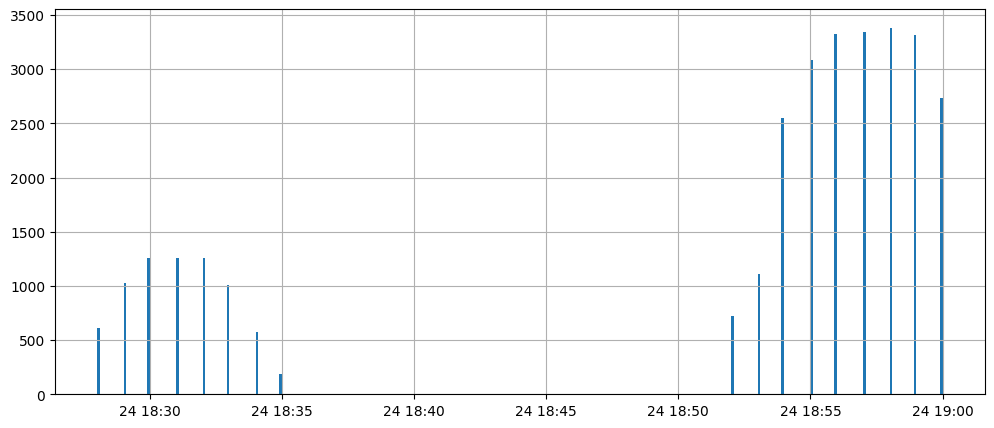

In [10]:
dash_visits_df['dt'].hist(bins=320, figsize=(12,5))
print('Количество данных с соответствующими временными метками:')

In [11]:
print(f'Всего уникальных значений {dash_visits_df["dt"].value_counts().count()}')

print('____________________________________')

dash_visits_df['dt'].value_counts(dropna=False).reset_index(
                                  ).rename(columns={'index':'dt','dt':'count'}).sort_values('dt').reset_index(drop=True)

Всего уникальных значений 17
____________________________________


,dt,count
0,2019-09-24 18:28:00,615
1,2019-09-24 18:29:00,1031
2,2019-09-24 18:30:00,1261
3,2019-09-24 18:31:00,1253
4,2019-09-24 18:32:00,1257
5,2019-09-24 18:33:00,1007
6,2019-09-24 18:34:00,576
7,2019-09-24 18:35:00,184
8,2019-09-24 18:52:00,719
9,2019-09-24 18:53:00,1107


#### Выводы по временным меткам данных:
1. Данные собирались всего полчаса, причем в два еще более коротких импульса (birst):
 * первый импульс с 18:28 до 18:35 (всего 7 минут),
 * второй импульс с 18:52 до 19:00 (всего 8 минут).
2. Временная метка округлена до минут - таким образом, кол-во уникальных значений временной метки сильно ограничено - 33 значения в периоде, за который присутствуют данные.  Причем сами данные есть только для 8+9=17 значений временной метки.
3. Скорее всего, округление до минуты означает период агрегации сырых данных по времени.

#### поле `visits` - тип int (кол-во взаимодействий с пользователями)

In [12]:
dash_visits_df['visits'].describe()

count    30745.000000
mean        10.089673
std         19.727601
min          1.000000
25%          1.000000
50%          3.000000
75%         10.000000
max        371.000000
Name: visits, dtype: float64

Распределение данных по значениям поля visits:


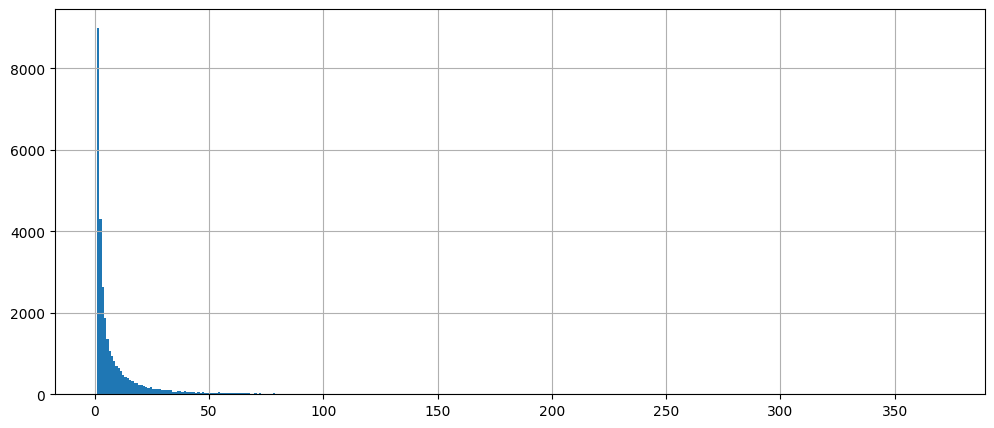

In [13]:
dash_visits_df['visits'].hist(bins=371, figsize=(12,5))
print('Распределение данных по значениям поля visits:')

Zoom распределение данных по значениям поля visits:


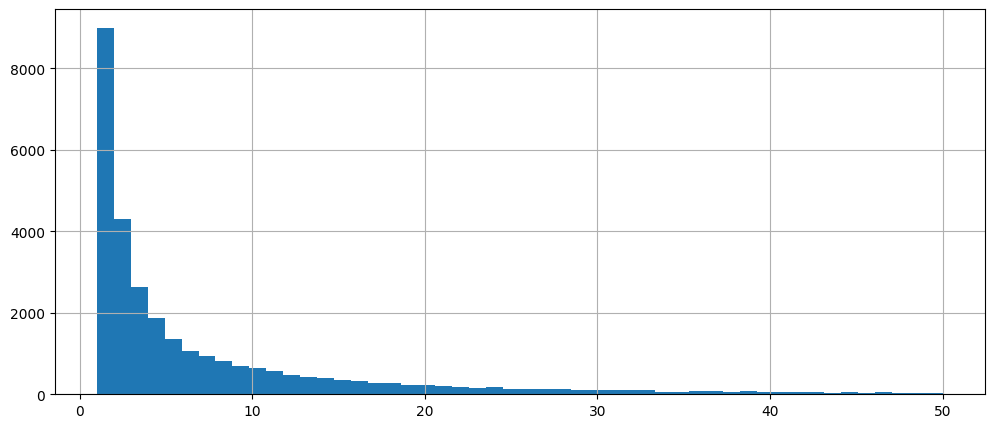

In [14]:
dash_visits_df.query('visits <=50')['visits'].hist(bins=50
                                                   , figsize=(12,5))
print('Zoom распределение данных по значениям поля visits:')

#### Выводы и предположения по полю visits:
1. Соответствие некоторого кол-ва визитов набору параметров (item_topic, source_topic, age_segment, timestamp) означает агрегацию:
 * где-то в начале пайплайна автоматизированного сбора данных был "сырой" лог с записями событий и точными временными метками (а также user_id, по которым осуществлялась сегментация по возрасту),
 * затем данные группировались по возрастным сегментам и поминутным периодам - кол-во визитов суммировалось и записывались в базу данных.
2. Проверим гипотезу выше - у нас есть (по результатам проведенного до сих пор изучения данных):
 * 11+11\*(14+15)+14\*15 = 540 уникальных комбинаций тем карточек (items) и источников (sources),
 * 6 возрастных диапазонов,
 * 17 уникальных значений временных меток,
 * ИТОГО получаем уникальных наборов параметров (item_topic, source_topic, age_segment, timestamp): 540\*6\*17 = 55080
 * а датасет имеет 30745 записей - то есть не для каждого уникального набора (item_topic, source_topic, age_segment, timestamp) есть значение visits. Нас это устраивает, хуже было бы, если бы записей было бы больше, чем уникальных комбинаций параметров - это бы означало, что агрегация не завершена по каким-то причинам (проблемы пайплайна)!

### Проверка дупликатов:
Поле `record_id` не участвует в проверке, так как его присваивает БД при добавлении записи из пайплайна сбора данных.  

В свете рассуждений выше, нам также следует проверять уникальность набора параметров (item_topic, source_topic, age_segment, dt):

In [15]:
dash_visits_df.drop(columns=['record_id','visits']).duplicated().sum()

0

### Выводы по необходимым модификациям данных для загрузки в Tableau Public
1. Поле `record_id` удаляем.
2. Список остальных полей соответствует ожиданиям Tableau:
 * поля Tableau.Dimentions - `item_topic`, `source_topic`, `age_segment`, `dt` (timestamp),
 * поле (должно быть одно) Tableau.Measures - `visits`.
3. Поле `visits` уже полностью проагрегировано - существует одна запись для уникального набора полей Tableau.Dimentions
4. Поскольку все временные метки за одно число, нет смысла его оставлять во всех графиках - лучше создать поле только со временем.  Однако, после проверки оказалось, что Tableau считывая только время, приписывает к нему год, поэтому в данных не будем этого делать.

## Модификация датасета под требования Tableau и сохранение в файл `dash_visits.csv` для загрузки в Tableau Public

In [16]:
dash_visits_df = dash_visits_df.drop(columns='record_id')

dash_visits_df

,item_topic,source_topic,age_segment,dt,visits
0,Деньги,Авто,18-25,2019-09-24 18:32:00,3
1,Деньги,Авто,18-25,2019-09-24 18:35:00,1
2,Деньги,Авто,18-25,2019-09-24 18:54:00,4
3,Деньги,Авто,18-25,2019-09-24 18:55:00,17
4,Деньги,Авто,18-25,2019-09-24 18:56:00,27
...,...,...,...,...,...
30740,Юмор,Финансы,36-40,2019-09-24 18:57:00,2
30741,Юмор,Финансы,36-40,2019-09-24 19:00:00,1
30742,Юмор,Финансы,41-45,2019-09-24 18:54:00,1
30743,Юмор,Финансы,41-45,2019-09-24 18:56:00,1


In [17]:
dash_visits_df.to_csv('dash_visits.csv', index=False)

# <<<<< END OF DOCUMENT >>>>>

In [18]:
stop_run = dt.datetime.now() # измеряем время выполнения команды run-all-cells
print('If you see this line, then run-all-cells command has been executed successfully!')
print('Full execution time was', round((stop_run-start_run).total_seconds(),2),'seconds. ',
     'The last run-through of this Notebook was on', stop_run.date(), 'at', str(stop_run.time()).split('.')[0] )

If you see this line, then run-all-cells command has been executed successfully!
Full execution time was 6.48 seconds.  The last run-through of this Notebook was on 2022-09-26 at 21:03:32
